In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Actividad 18

In [4]:
#Crea/Presenta la forma que creas más conveniente para  describir cuántos alumnos hay por grados.

In [5]:
data_students=pd.read_csv("C:\\Users\\aportillo\Downloads\\data_students.csv")
data_students.head(3)

,Unnamed: 0,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,2,Kevin Rodriguez,M,12th,Huang High School,90,60


In [6]:
#Alumnos por grado
data_students['grade'].value_counts()

9th     11408
10th    10168
11th     9695
12th     7899
Name: grade, dtype: int64

In [7]:
#Separar por keys
grados=data_students['grade'].value_counts().keys()
grados

Index(['9th', '10th', '11th', '12th'], dtype='object')

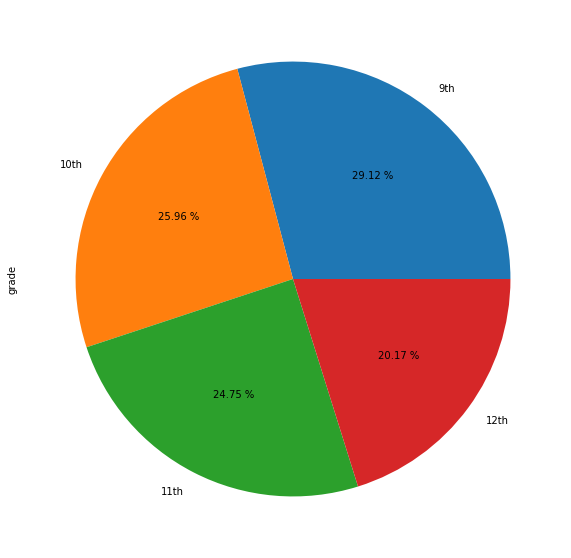

In [8]:
#Crear gráfica
pie_grades=data_students["grade"].value_counts().plot.pie(figsize=(10,10),labels=grados, autopct="%0.2f %%")

In [9]:
#Crea / Presenta la forma que creas más conveniente para  describir cuántos alumnos por escuela tuvieron el mejor puntaje 
#en "reading", y con ello saber que genero es el que  predomina en este ﬁltro

In [10]:
#Alumnos por escuela
data_students['school_name'].value_counts()

Bailey High School       4976
Johnson High School      4761
Hernandez High School    4635
Rodriguez High School    3999
Figueroa High School     2949
Huang High School        2917
Ford High School         2739
Wilson High School       2283
Cabrera High School      1858
Wright High School       1800
Shelton High School      1761
Thomas High School       1635
Griffin High School      1468
Pena High School          962
Holden High School        427
Name: school_name, dtype: int64

In [11]:
escuelas=data_students['school_name'].value_counts().keys()

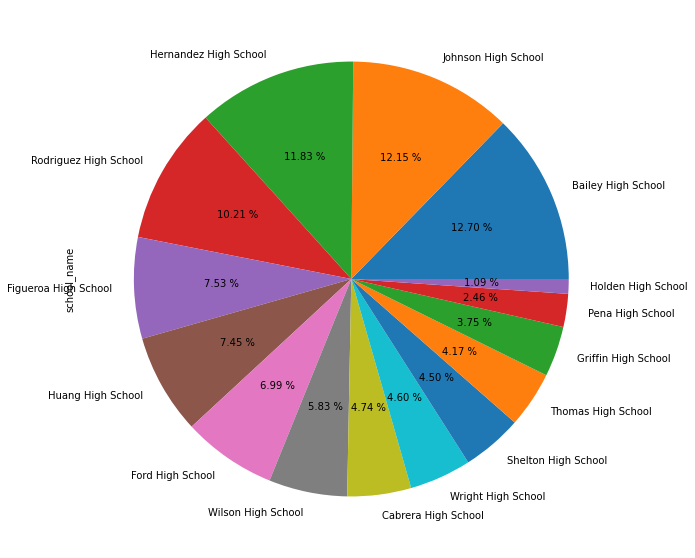

In [12]:
#Crear gráfica
pie_grades=data_students["school_name"].value_counts().plot.pie(figsize=(10,10),labels=escuelas, autopct="%0.2f %%")

# Actividad 19

## Corte por género
Obtener los dummies por genero y guardar en dummies_genero
Crear gender_scname con columnas gender y school name
Hacer un merge (concat) entre estos dos dataframe y llamarlo 'plotbygen'
Obtener el head
Agrupar utilizando la columna school name por medio de una suma
Crear un gráfico de columnas

In [18]:
#Obtener dummies por genero y guardar en dummies_genero
dummies_genero=pd.get_dummies(data_students[["gender"]])
dummies_genero.head(2)

,gender_F,gender_M
0,0,1
1,0,1


In [20]:
#Crear gender_scname con columnas gender y school name
gender_scname=data_students[["gender", "school_name"]]
gender_scname.head(5)

,gender,school_name
0,M,Huang High School
1,M,Huang High School
2,M,Huang High School
3,M,Huang High School
4,F,Huang High School


In [22]:
#Hacer un merge (concat) entre estos dos dataframe y llamarlo 'plotbygen' 
plotbygen=pd.concat([dummies_genero,gender_scname], axis=1)

#Obtener el head
plotbygen.head(5)

,gender_F,gender_M,gender,school_name
0,0,1,M,Huang High School
1,0,1,M,Huang High School
2,0,1,M,Huang High School
3,0,1,M,Huang High School
4,1,0,F,Huang High School


In [24]:
#Agrupar utilizando la columna school name por medio de una suma
sumgen=plotbygen.groupby(["school_name"]).sum()
sumgen

,gender_F,gender_M
school_name,,
Bailey High School,2537.0,2439.0
Cabrera High School,942.0,916.0
Figueroa High School,1451.0,1498.0
Ford High School,1376.0,1363.0
Griffin High School,720.0,748.0
Hernandez High School,2363.0,2272.0
Holden High School,220.0,207.0
Huang High School,1417.0,1500.0
Johnson High School,2393.0,2368.0


In [51]:
#Crear un gráfico de columnas
gen_labels=data_students['gender'].value_counts().keys()
gen_labels

Index(['F', 'M'], dtype='object')

<AxesSubplot:xlabel='school_name'>

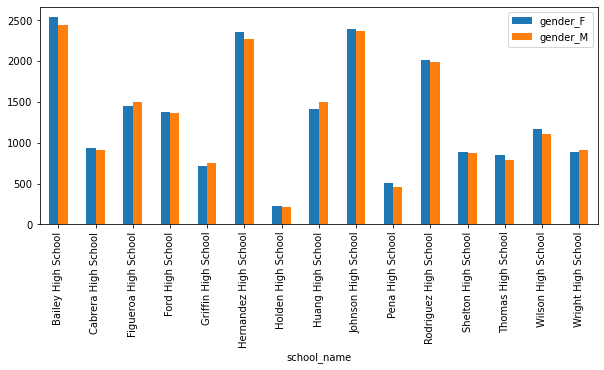

In [52]:
sumgen.plot.bar(figsize=(10,4))

# Actividad 20
## Alumnos con menor puntuación
1.- Buscar el min en "reading scrore" y guardar el data frame como readin_min

2.- Crear gender_scname con columnas gender y school name

3.- Obtener los dummies por genero y guardar en dummies_genero 

4.- Hacer un merge (concat) entre estos dos dataframe y llamarlo 'plotbygen' 

5.- Obtener el head 

6.- Agrupar utilizando la columna school name por medio de una suma y guardar en "plot_grouped"

7.- Crear un gráfico de columnas

In [78]:
#Buscar el min "reading score"
reading_min=data_students[data_students["reading_score"]==data_students["reading_score"].min()]
reading_min

,Unnamed: 0,Student ID,student_name,gender,grade,school_name,reading_score,math_score
26,26,26,Melanie Decker,F,9th,Huang High School,63,85
37,37,37,Jesse Newton,M,10th,Huang High School,63,66
60,60,60,Jared Wood,M,9th,Huang High School,63,89
124,124,124,Bonnie Mckinney,F,11th,Huang High School,63,65
131,131,131,Thomas Strickland,M,9th,Huang High School,63,77
...,...,...,...,...,...,...,...,...
37420,37420,37420,Darryl Kelly,M,12th,Ford High School,63,62
37422,37422,37422,Megan Heath,F,10th,Ford High School,63,79
37484,37484,37484,Angela Turner,F,12th,Ford High School,63,58
37520,37520,37520,Benjamin Odonnell,M,11th,Ford High School,63,74


In [80]:
#Crear gender_scname con columnas gender y school name
gender_scname=reading_min[["school_name", "gender"]]
gender_scname

,school_name,gender
26,Huang High School,F
37,Huang High School,M
60,Huang High School,M
124,Huang High School,F
131,Huang High School,M
...,...,...
37420,Ford High School,M
37422,Ford High School,F
37484,Ford High School,F
37520,Ford High School,M


In [81]:
#Obtener los dummies por genero y guardar en dummies_genero
dummies_genero=pd.get_dummies(gender_scname[["gender"]])
dummies_genero.head(5)

,gender_F,gender_M
26,1,0
37,0,1
60,0,1
124,1,0
131,0,1


In [82]:
#Hacer un merge (concat) entre estos dos dataframe y llamarlo 'plotbygen'
plotbygen2=pd.concat([dummies_genero,gender_scname], axis=1)

In [83]:
#Obtener el head
plotbygen2.head(10)

,gender_F,gender_M,school_name,gender
26,1,0,Huang High School,F
37,0,1,Huang High School,M
60,0,1,Huang High School,M
124,1,0,Huang High School,F
131,0,1,Huang High School,M
196,0,1,Huang High School,M
197,0,1,Huang High School,M
210,0,1,Huang High School,M
279,0,1,Huang High School,M
288,0,1,Huang High School,M


In [84]:
#Agrupar utilizando la columna school name por medio de una suma y guardar en "plot_grouped"
plot_agrouped=plotbygen2.groupby(["school_name"]).sum()
plot_agrouped

,gender_F,gender_M
school_name,,
Bailey High School,64,71
Figueroa High School,36,42
Ford High School,42,43
Hernandez High School,64,70
Huang High School,42,40
Johnson High School,65,75
Rodriguez High School,48,49


<AxesSubplot:xlabel='school_name'>

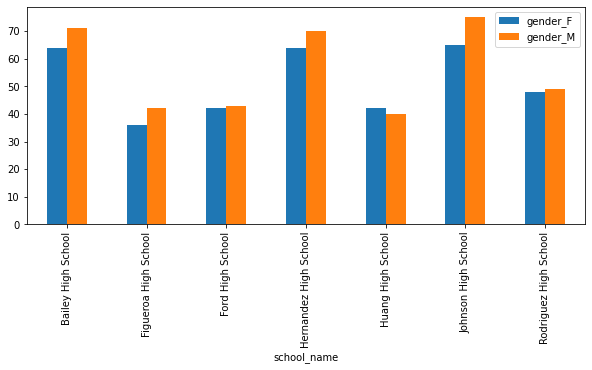

In [85]:
#Crear un gráfico de columnas
plot_agrouped.plot.bar(figsize=(10,4))

## Definir una función con dos entradas
1.- La función llamada 'Func1' debe graficar los alumnos por escuela con 'x' putaje de 'y' asignatura
Func1(reading_score,63)

In [96]:
def Func1(asignatura,puntaje):
    reading_min = data_students[data_students[asignatura]==puntaje]
    gender_scname = reading_min[["gender","school_name"]]
    dummies_gen = pd.get_dummies(reading_min["gender"])
    plotbygen = pd.concat([gender_scname, dummies_gen], axis=1)
    plot_grouped = plotbygen.groupby(["school_name"]).sum()
    plot_grouped.plot.bar(figsize=(10,4))

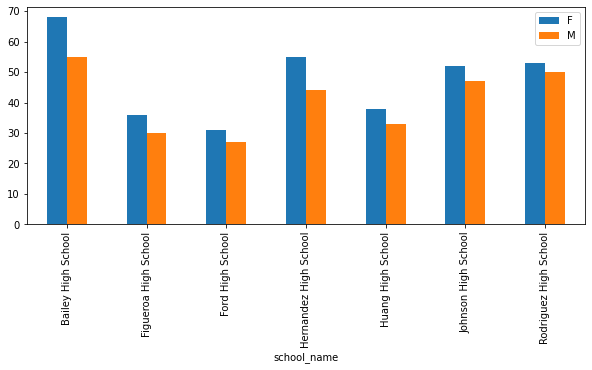

In [98]:
Func1("math_score", 63)

In [104]:
def Func2(y,x):
    print("Gráfico de ", y, "con puntaje de ",x)
    y=data_students[y]
    df1=data_students[x==y]
    gender_scname=df1[["gender", "school_name"]]
    dummies_gen=pd.get_dummies(gender_scname[["gender"]])
    plotbygen=pd.concat([gender_scname, dummies_gen], axis=1)
    plot_grouped=plotbygen.groupby(["school_name"]).sum()
    return plot_grouped.plot(kind="bar", color=["blue", "chocolate"], figsize=(15,9))

Gráfico de  math_score con puntaje de  63


<AxesSubplot:xlabel='school_name'>

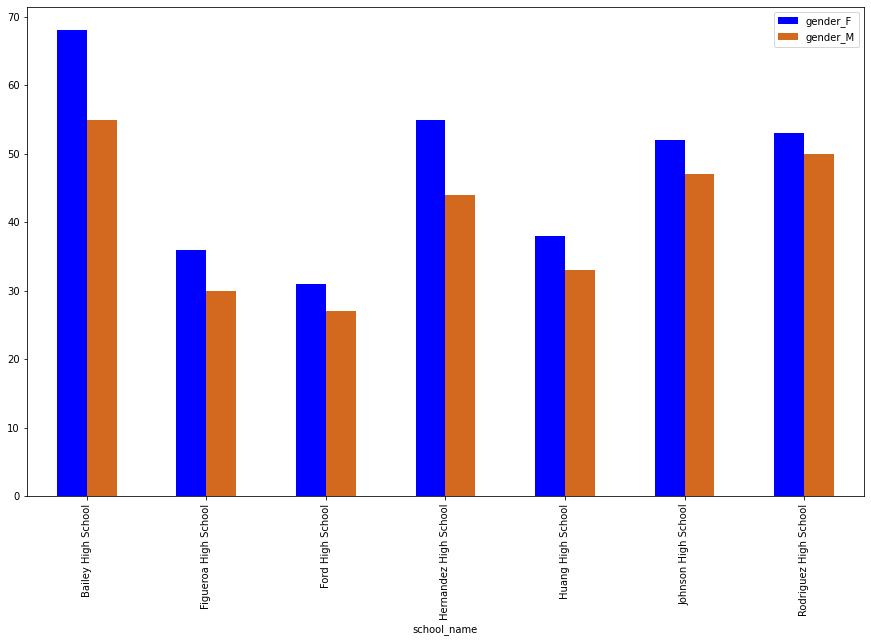

In [105]:
Func2("math_score", data_students["reading_score"].min())

In [107]:
data_students["reading_score"].mean(), data_students["math_score"].mean()

(81.87784018381414, 78.98537145774827)

<AxesSubplot:>

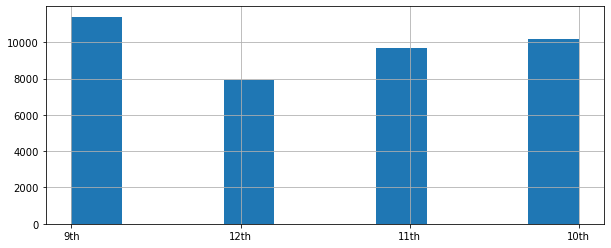

In [108]:
data_students["grade"].hist(figsize=(10,4))

<AxesSubplot:>

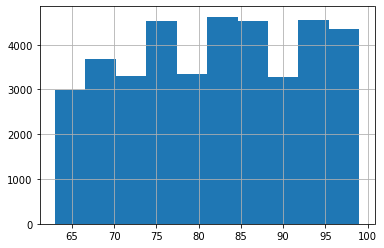

In [109]:
data_students["reading_score"].hist()
#La media está en el centro del gráfico